<a href="https://colab.research.google.com/github/CoWoGeo/PUS2022_CWolk/blob/main/HW6/HW6_RandomForestsChicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Following the paper "Examining the feasibility of using open data to benchmark building energy usage in cities: A data science and policy perspective" [Roth et al 2019](https://www.researchgate.net/publication/337074109_Examining_the_feasibility_of_using_open_data_to_benchmark_building_energy_usage_in_cities_A_data_science_and_policy_perspective), choose 2 cities in the dataset available through the paper's github repository https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking

This paper is an excellent example of reproducible research. 

I also created an example of using random forest classifier and regressors here https://github.com/fedhere/PUS2022_FBianco/blob/master/classdemo/COVID19LOS_featureExtractionRFexample.ipynb and there are links at the bottom of this notebook to useful functions and examples on the internet of applications of methods you will need to use.

1. Read the introduction to the paper and describe here (briefly) the goals of their analysis (and the analysis that you are about to reproduce). Max 200 words.
*2. Choose 2 cities (any 2 cities except Seattle cause I am running some of the Seattle analysis below for guidance)
3. For each of the 2 cities reproduce their analysis by 

  3.1 gathering the original data from their repository (see below for Seattle example)

  3.2 clean the data according to their data preparation scheme, including one-hot-encoding categorical variables, except to impute missing data using KNearestNeighors instead of Gibbs sampling (see below)

  3.3 run a Random Forest (RF) Regressor to predict the total energy consumption.

  3.4 evaluate the RF model performance by printing the R2 score (the default score in SKLearn RF) for training and test set (discuss)

  3.5 plot the features sorted by their importance and identify the most important features. are they consistent between the 2 cities? are they consistent with the paper's result?
4 compare the result for the 2 cities (discuss)

# Importing Libraries

In [ ]:
import pylab as plt
import pandas as pd
import numpy as np

In [ ]:
# One Hot Encoder moved from below
from sklearn.preprocessing import OneHotEncoder
# Train Test splitter moved from below
from sklearn.model_selection import train_test_split
# Random Forest Regressor moved from below
from sklearn.ensemble import RandomForestRegressor

# Reading in Chicago Data

In [ ]:
chicago = pd.read_csv("https://raw.githubusercontent.com/Urban-Informatics-Lab/Open-Data-Benchmarking/master/Chicago/Chicago_Energy_Benchmarking_-_2016_Data_Reported_in_2017.csv")

# Inspecting the dataframe

In [ ]:
print("there are (rows, columns) = ", (chicago.shape), "in the dataframe")

there are (rows, columns) =  (2717, 25) in the dataframe


Fewer columns than in the Seattle example!

In [ ]:
chicago.describe()

,Data Year,ID,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),All Other Fuel Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude
count,2717.0,2717.000000,2.717000e+03,2712.000000,2717.000000,2300.000000,2.691000e+03,2.478000e+03,6.700000e+01,8.800000e+01,1.700000e+01,2688.000000,2688.000000,2658.000000,2658.000000,2673.000000,2673.000000,2717.000000,2717.000000
mean,2016.0,184277.504233,2.444146e+05,1962.731932,1.408907,60.012609,1.081069e+07,1.191014e+07,2.797624e+07,1.759946e+07,1.100594e+06,94.208408,180.017820,99.133296,184.965500,2630.786495,10.103629,41.885083,-87.653376
std,0.0,59795.814503,3.956004e+05,36.324819,5.181418,28.350327,2.502301e+07,2.785050e+07,5.054843e+07,1.955778e+07,2.637424e+06,125.939184,166.056539,127.267249,166.420203,5794.436792,9.002384,0.068259,0.047320
min,2016.0,100001.000000,5.000000e+04,1872.000000,1.000000,1.000000,5.028900e+03,1.284000e+03,-1.714850e+07,-1.383204e+06,1.587000e+04,0.200000,0.200000,0.300000,0.300000,32.500000,0.400000,41.651404,-87.905562
25%,2016.0,120518.000000,7.491000e+04,1927.750000,1.000000,38.000000,1.948236e+06,3.213429e+06,6.435511e+06,4.815333e+06,4.416000e+04,61.800000,113.875000,65.400000,118.625000,602.100000,6.300000,41.860795,-87.666607
50%,2016.0,173702.000000,1.229450e+05,1969.000000,1.000000,65.000000,4.035714e+06,5.585163e+06,1.343250e+07,9.720848e+06,7.009020e+04,79.400000,148.100000,84.400000,154.050000,1099.500000,8.300000,41.890528,-87.640861
75%,2016.0,251346.000000,2.520760e+05,1997.000000,1.000000,84.000000,9.735142e+06,1.191968e+07,2.439484e+07,2.255981e+07,1.047696e+05,101.050000,196.575000,107.275000,201.575000,2435.700000,11.100000,41.925024,-87.626668
max,2016.0,260184.000000,9.245333e+06,2016.000000,236.000000,100.000000,4.857050e+08,5.493302e+08,3.575457e+08,9.075356e+07,8.912998e+06,5637.700000,6001.500000,5637.700000,6001.500000,127610.000000,304.600000,42.019367,-87.527913


# TASK 1 Clean the data 
*Follow closely the second paragraph of Section 4 DATA. Name each step you do accordingly to the description in the paragraf
https://www.researchgate.net/publication/337074109_Examining_the_feasibility_of_using_open_data_to_benchmark_building_energy_usage_in_cities_A_data_science_and_policy_perspective*

Summary of that paragraph:


*   Removed irrelevant building-identifying features such as address
*   Removed features w/ missing values for >40% of buildings in dataset because otherwise those will be imputed and bias the results.
*   Eliminated buildings w/ missing site EUI to avoid imputing values for dependent variable
*   Imputed data for remaining missing variables by generating multiple imputations by Gibbs sampling using classification and regression trees (I think this is a later step in the homework.)
*   Authors note that the data is extremely heterogeneous within and between datasets in terms of building counts and building sizes. This is partly due to local mandates, inclusion of government buildings, and smaller buildings opting in in some places. They note that "some models are better able to handle less data than others."

In [ ]:
# summarize the number of rows with missing values for each column
for c in chicago.columns:
  
  # count number of rows with missing values
  n_miss = chicago[c].isnull().sum()
  perc = n_miss / chicago.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, chicago[c].dtype, 
                                                  n_miss, perc))


Data Year (int64):  Missing: 0 (0.0%)
ID (int64):  Missing: 0 (0.0%)
Property Name (object):  Missing: 0 (0.0%)
Address (object):  Missing: 0 (0.0%)
ZIP Code (object):  Missing: 0 (0.0%)
Community Area (object):  Missing: 0 (0.0%)
Primary Property Type (object):  Missing: 0 (0.0%)
Gross Floor Area - Buildings (sq ft) (float64):  Missing: 0 (0.0%)
Year Built (float64):  Missing: 5 (0.2%)
# of Buildings (int64):  Missing: 0 (0.0%)
ENERGY STAR Score (float64):  Missing: 417 (15.3%)
Electricity Use (kBtu) (float64):  Missing: 26 (1.0%)
Natural Gas Use (kBtu) (float64):  Missing: 239 (8.8%)
District Steam Use (kBtu) (float64):  Missing: 2650 (97.5%)
District Chilled Water Use (kBtu) (float64):  Missing: 2629 (96.8%)
All Other Fuel Use (kBtu) (float64):  Missing: 2700 (99.4%)
Site EUI (kBtu/sq ft) (float64):  Missing: 29 (1.1%)
Source EUI (kBtu/sq ft) (float64):  Missing: 29 (1.1%)
Weather Normalized Site EUI (kBtu/sq ft) (float64):  Missing: 59 (2.2%)
Weather Normalized Source EUI (kBtu/sq 

## Features missing greater than 40% of the data:


*  District Steam Use (kBtu) (float64):  Missing: 2650 (97.5%)
*  District Chilled Water Use (kBtu) (float64):  Missing: 2629 (96.8%)
*  All Other Fuel Use (kBtu) (float64):  Missing: 2700 (99.4%)

Everything else is pretty low (<10% missing) except "ENERGY STAR Score (float64):  Missing: 417 (15.3%)"



In [ ]:
# dropping columns w/ over 40% missing
for c in chicago.columns:
  
  # count number of rows with missing values
  n_miss = chicago[c].isnull().sum()
  perc = n_miss / chicago.shape[0] * 100
  if perc > 40:
    chicago.drop(c, axis=1, inplace=True)

print("there are (rows, columns) = ", (chicago.shape), "in the dataframe")


there are (rows, columns) =  (2717, 22) in the dataframe


In [ ]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Data Year                                   2717 non-null   int64  
 1   ID                                          2717 non-null   int64  
 2   Property Name                               2717 non-null   object 
 3   Address                                     2717 non-null   object 
 4   ZIP Code                                    2717 non-null   object 
 5   Community Area                              2717 non-null   object 
 6   Primary Property Type                       2717 non-null   object 
 7   Gross Floor Area - Buildings (sq ft)        2717 non-null   float64
 8   Year Built                                  2712 non-null   float64
 9   # of Buildings                              2717 non-null   int64  
 10  ENERGY STAR 

In [ ]:
for c in chicago.columns:
  
  # count number of rows with missing values
  n_miss = chicago[c].isnull().sum()
  perc = n_miss / chicago.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, chicago[c].dtype, 
                                                  n_miss, perc))

Data Year (int64):  Missing: 0 (0.0%)
ID (int64):  Missing: 0 (0.0%)
Property Name (object):  Missing: 0 (0.0%)
Address (object):  Missing: 0 (0.0%)
ZIP Code (object):  Missing: 0 (0.0%)
Community Area (object):  Missing: 0 (0.0%)
Primary Property Type (object):  Missing: 0 (0.0%)
Gross Floor Area - Buildings (sq ft) (float64):  Missing: 0 (0.0%)
Year Built (float64):  Missing: 5 (0.2%)
# of Buildings (int64):  Missing: 0 (0.0%)
ENERGY STAR Score (float64):  Missing: 417 (15.3%)
Electricity Use (kBtu) (float64):  Missing: 26 (1.0%)
Natural Gas Use (kBtu) (float64):  Missing: 239 (8.8%)
Site EUI (kBtu/sq ft) (float64):  Missing: 29 (1.1%)
Source EUI (kBtu/sq ft) (float64):  Missing: 29 (1.1%)
Weather Normalized Site EUI (kBtu/sq ft) (float64):  Missing: 59 (2.2%)
Weather Normalized Source EUI (kBtu/sq ft) (float64):  Missing: 59 (2.2%)
Total GHG Emissions (Metric Tons CO2e) (float64):  Missing: 44 (1.6%)
GHG Intensity (kg CO2e/sq ft) (float64):  Missing: 44 (1.6%)
Latitude (float64):  M

## More data cleaning

In [ ]:
# Dropping columns w/ building identifying data
chicagoclean = chicago.drop(["Property Name", "Address", "ID"], axis=1)

In [ ]:
# Dropping Site EUI NaNs
chicagoclean = chicagoclean.dropna(subset=["Site EUI (kBtu/sq ft)"])

In [ ]:
chicagoclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2688 entries, 0 to 2716
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Data Year                                   2688 non-null   int64  
 1   ZIP Code                                    2688 non-null   object 
 2   Community Area                              2688 non-null   object 
 3   Primary Property Type                       2688 non-null   object 
 4   Gross Floor Area - Buildings (sq ft)        2688 non-null   float64
 5   Year Built                                  2683 non-null   float64
 6   # of Buildings                              2688 non-null   int64  
 7   ENERGY STAR Score                           2300 non-null   float64
 8   Electricity Use (kBtu)                      2682 non-null   float64
 9   Natural Gas Use (kBtu)                      2474 non-null   float64
 10  Site EUI (kB

# TASK 2: transform input feature as needed

In [ ]:
chicagoclean.describe()

,Data Year,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude
count,2688.0,2.688000e+03,2683.000000,2688.000000,2300.000000,2.682000e+03,2.474000e+03,2688.000000,2688.000000,2658.000000,2658.000000,2673.000000,2673.000000,2688.000000,2688.000000
mean,2016.0,2.448678e+05,1962.894521,1.405878,60.012609,1.078202e+07,1.189740e+07,94.208408,180.017820,99.133296,184.965500,2630.786495,10.103629,41.885177,-87.653300
std,0.0,3.964045e+05,36.286206,5.201993,28.350327,2.498350e+07,2.786680e+07,125.939184,166.056539,127.267249,166.420203,5794.436792,9.002384,0.068316,0.047197
min,2016.0,5.000000e+04,1872.000000,1.000000,1.000000,5.028900e+03,1.284000e+03,0.200000,0.200000,0.300000,0.300000,32.500000,0.400000,41.651404,-87.905562
25%,2016.0,7.500000e+04,1928.000000,1.000000,38.000000,1.947823e+06,3.213429e+06,61.800000,113.875000,65.400000,118.625000,602.100000,6.300000,41.860920,-87.666607
50%,2016.0,1.237265e+05,1969.000000,1.000000,65.000000,4.031640e+06,5.581524e+06,79.400000,148.100000,84.400000,154.050000,1099.500000,8.300000,41.890566,-87.640766
75%,2016.0,2.521352e+05,1997.000000,1.000000,84.000000,9.722706e+06,1.190188e+07,101.050000,196.575000,107.275000,201.575000,2435.700000,11.100000,41.925276,-87.626682
max,2016.0,9.245333e+06,2016.000000,236.000000,100.000000,4.857050e+08,5.493302e+08,5637.700000,6001.500000,5637.700000,6001.500000,127610.000000,304.600000,42.019367,-87.527913


## What should you look at in the data describe?
I guess I should mostly look at the standard deviation, min, and max for continuous measures and the range for year built. I notice that the building year built varies from 1872 to 2016. It's a little hard for me to compare some of the energy use metrics just by looking at them because the use numbers are so high. There are building(s) with an Energy Star score of 1!

## Replace features with log features
This is what their code says for Chicago. It looks like they did log features for Total Site Energy kBtu and Gross Floor Area - Buildings (sq ft) Looking at the describe table above, there isn't actually a Total Site Energy Use kBtu column; it's separated into Electricity and Gas. However, those two and the square footage both have standard deviations that are much larger than any other feature, so I guess that's why the authors took a log.


```
# define features
chicago_features=c("Primary.Property.Type","Gross.Floor.Area...Buildings..sq.ft.","Year.Built","X..of.Buildings")
x_chicago=chicago[,chicago_features]
colnames(x_chicago)
x_chicago$log_floor_area=log(x_chicago$Gross.Floor.Area...Buildings..sq.ft.)
y_chicago=chicago['log_total_site_energy_KBTU']

```



Originally, I did the log features at this step. But then I got to later steps in our homework and saw that they were added there with some relevant code that might be harder to make work if I add them here. So I'm not running the code here.

In [ ]:
#adding column of log values for Gross Floor Area
#derp I guess this is a later step
#chicagoclean["GFA Bldgs Log"] = np.log10(chicagoclean["Gross Floor Area - Buildings (sq ft)"])

## Calculating Total Building Energy Use Feature and Logifying

The authors write: "Total building energy use (kBtu) for each building in each city is determined by multiplying the site energy use intensity (EUI) by the square footage area of the building. Before modeling, this variable was log-transformed to account for the wide range and positive skew of energy consumption values, resulting in a log-normal distribution."

The authors used Total Building Energy Use partly because unlike Chicago, some cities don't have a breakdown of different types of energy use (electricity vs gas, for example).\\

In [ ]:
#adding column for building energy use
chicagoclean["BuildingEnergyUse(kBtu)"] = chicagoclean["Gross Floor Area - Buildings (sq ft)"]*chicagoclean["Site EUI (kBtu/sq ft)"]

In [ ]:
#making building energy use log
chicagoclean["BuildingEnergyUse(kBtu)"] = np.log10(chicagoclean["BuildingEnergyUse(kBtu)"])

In [ ]:
chicagoclean.info() #why is this helpful to print?
# helpful for list of columns, datatype, missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2688 entries, 0 to 2716
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Data Year                                   2688 non-null   int64  
 1   ZIP Code                                    2688 non-null   object 
 2   Community Area                              2688 non-null   object 
 3   Primary Property Type                       2688 non-null   object 
 4   Gross Floor Area - Buildings (sq ft)        2688 non-null   float64
 5   Year Built                                  2683 non-null   float64
 6   # of Buildings                              2688 non-null   int64  
 7   ENERGY STAR Score                           2300 non-null   float64
 8   Electricity Use (kBtu)                      2682 non-null   float64
 9   Natural Gas Use (kBtu)                      2474 non-null   float64
 10  Site EUI (kB

In [ ]:
chicagoclean.describe()

,Data Year,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,BuildingEnergyUse(kBtu)
count,2688.0,2.688000e+03,2683.000000,2688.000000,2300.000000,2.682000e+03,2.474000e+03,2688.000000,2688.000000,2658.000000,2658.000000,2673.000000,2673.000000,2688.000000,2688.000000,2688.000000
mean,2016.0,2.448678e+05,1962.894521,1.405878,60.012609,1.078202e+07,1.189740e+07,94.208408,180.017820,99.133296,184.965500,2630.786495,10.103629,41.885177,-87.653300,7.080747
std,0.0,3.964045e+05,36.286206,5.201993,28.350327,2.498350e+07,2.786680e+07,125.939184,166.056539,127.267249,166.420203,5794.436792,9.002384,0.068316,0.047197,0.440954
min,2016.0,5.000000e+04,1872.000000,1.000000,1.000000,5.028900e+03,1.284000e+03,0.200000,0.200000,0.300000,0.300000,32.500000,0.400000,41.651404,-87.905562,4.198657
25%,2016.0,7.500000e+04,1928.000000,1.000000,38.000000,1.947823e+06,3.213429e+06,61.800000,113.875000,65.400000,118.625000,602.100000,6.300000,41.860920,-87.666607,6.766312
50%,2016.0,1.237265e+05,1969.000000,1.000000,65.000000,4.031640e+06,5.581524e+06,79.400000,148.100000,84.400000,154.050000,1099.500000,8.300000,41.890566,-87.640766,7.021055
75%,2016.0,2.521352e+05,1997.000000,1.000000,84.000000,9.722706e+06,1.190188e+07,101.050000,196.575000,107.275000,201.575000,2435.700000,11.100000,41.925276,-87.626682,7.342854
max,2016.0,9.245333e+06,2016.000000,236.000000,100.000000,4.857050e+08,5.493302e+08,5637.700000,6001.500000,5637.700000,6001.500000,127610.000000,304.600000,42.019367,-87.527913,9.062723


## Throw away data where the **target** variable is missing

*I will remove each row where I do not have the target variable. To do that I use `df.dropna()` and the subset argument of `df.dropna()` set to the name of the variable. The `how` should be set to "any" cause you want to drop the row where any values in the subset is NaN (this is a subset of one column, so it is obvious, but imagine if you were passing more than one column to the call `dropna()`*

In [ ]:
 # I actually don't have missing target variables. I think I dropped them above.
chicagoclean["BuildingEnergyUse(kBtu)"].isna().sum()

0

In [ ]:
# leaving this code for now in case I need to drop rows with NaNs in other
#columns
original_len = chicagoclean.shape[0]
chicagoclean.dropna(subset=['BuildingEnergyUse(kBtu)'])

print("I lost {:.2f}% of the data".format((1 - (chicagoclean.shape[0] / original_len)) * 100))

I lost 0.00% of the data


In [ ]:
# isolate the target variable first (endogenous)
y = chicagoclean["BuildingEnergyUse(kBtu)"].values

In [ ]:
# and the input variables (exogenous)
X = chicagoclean.drop("BuildingEnergyUse(kBtu)", axis=1)

### Separate categorical and numerical values
you will proceed to missing data imputation differently in the 2 cases

In [ ]:
# I am giving you the solution but please take note of how one does this!
X_numeric_data = X.select_dtypes(include=[np.number])
X_categorical_data = X.select_dtypes(exclude=[np.number])

In [ ]:
X_numeric_data.shape

(2688, 15)

### is there anything suspicious? anything thas is in fact **not** a numerical variable? that will depend on how you did in TASK 1

Data Year might be a variable...if it were anything but 2016. Latitude and Longitude are kind of borderline. I assume for an area as small as this, lat/long is more associated with what kind of buildings are in a spot (such as zoning) than the performance of a building (such as climate). Location is included in categorical, too.

In [ ]:
X_numeric_data.head()

,Data Year,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude
0,2016,99000.0,2000.0,1,96.0,1935003.2,2783435.5,47.7,90.9,46.7,87.8,504.5,5.1,41.884253,-87.63245
1,2016,92072.0,2014.0,1,55.0,2477744.2,3147551.1,61.1,120.4,63.6,123.0,623.9,6.8,41.947402,-87.64964
2,2016,136000.0,1924.0,1,24.0,5724360.2,1951759.8,56.4,147.2,59.8,157.4,1158.8,8.5,41.899208,-87.62729
3,2016,182246.0,1964.0,1,41.0,3158535.8,17010259.2,110.7,152.4,121.1,163.3,1485.7,8.2,41.845860,-87.62921
4,2016,193497.0,1930.0,1,94.0,3620381.1,5465540.1,47.0,88.4,48.8,89.0,957.6,4.9,41.874295,-87.65018


In [ ]:
X_categorical_data.head()

,ZIP Code,Community Area,Primary Property Type,Location
0,60616,Armour Square,Multifamily Housing,"(41.8842525, -87.63245)"
1,60613,Lake View,Multifamily Housing,"(41.9474017, -87.64964)"
2,60611,Near North Side,Multifamily Housing,"(41.8992081, -87.62729)"
3,60616,Douglas,Multifamily Housing,"(41.8458598, -87.62921)"
4,60607,Near West Side,Multifamily Housing,"(41.8742951, -87.65018)"


In [ ]:
X_categorical_data.shape

(2688, 4)

## TASK 2.1: make a scatter plot to assess covariance of numerical variables

### IMPORTANT!! 

there are going to be some **very** collinear variable - zoom in and chek them out - what are they? You will need to remove variables that are _identical_, because you obviously do not want to imput the data twice in the model - it will not improve the model and it will impact the feature importance analysis.

What else looks like it should be removed? 

**Reason about it and explain your choices in the caption of the figure**



In [ ]:
# THIS TAKES A LOOOONG TIME! ~10 MINUTES ON COLAB FOR ME
#import seaborn as sns
#sns.pairplot(X_numeric_data)
# DELETE OUTPUT! (as in make the code not run?)

Dr. Bianco and I talked about what to drop!
I deleted ALL the EUI ones (including "weather-normalized") electricity use, gas use, and GHG measures because they are basically all redundant or intra-dependent measures of energy use. I deleted Data Year because it is always 1960. I deleted Latitude and Longitude because it is also in categorical data and probably adds more complexity than it's worth for such a small spatial area. (Also, zip code and neighborhoods capture some spatial aspects with fewer categories.)

In [ ]:
# dropping some columns
X_numeric_data.drop(["Data Year", "ENERGY STAR Score", "Electricity Use (kBtu)",
                     "Natural Gas Use (kBtu)", "Source EUI (kBtu/sq ft)",
                     "Site EUI (kBtu/sq ft)", 
                     "Weather Normalized Site EUI (kBtu/sq ft)", 
                     "Weather Normalized Source EUI (kBtu/sq ft)", "Latitude", 
                     "Longitude", "Total GHG Emissions (Metric Tons CO2e)",
                     "GHG Intensity (kg CO2e/sq ft)"], axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X_numeric_data.describe()

,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings
count,2.688000e+03,2683.000000,2688.000000
mean,2.448678e+05,1962.894521,1.405878
std,3.964045e+05,36.286206,5.201993
min,5.000000e+04,1872.000000,1.000000
25%,7.500000e+04,1928.000000,1.000000
50%,1.237265e+05,1969.000000,1.000000
75%,2.521352e+05,1997.000000,1.000000
max,9.245333e+06,2016.000000,236.000000


In [ ]:
# this does not have to be identical to my output as you may have dropped different variables
print("there are (rows, columns) = ", X_numeric_data.shape, "in the numerical variables")

there are (rows, columns) =  (2688, 3) in the numerical variables


*As they do in the original research https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking/blob/master/Lasso_RandomForest.Rmd we should transform some variables into their log values 

their original code (which is in R not in python!) is*
```
x_seattle$log_total_area=log(x_seattle$gross_floor_area_total_SF)
x_seattle$log_parking_area=log(x_seattle$gross_floor_area_parking_SF)
x_seattle$log_bldg_area=log(x_seattle$gross_floor_area_building_SF)
x_seattle$log_area_1=log(x_seattle$gross_floor_area_property_type_first_SF)

```
*the names are a bit different*


In [ ]:
# note: recheck missing values 
# this is important: after I apply the log function to some variables cause log(0) = -infinity
print("there are {} missing or infinity values in the numerical data".format(X_numeric_data.isnull().sum().sum()))

there are 5 missing or infinity values in the numerical data


In [ ]:
# translated to python
X_numeric_data["Gross Floor Area - Buildings (sq ft)"] = np.log10(X_numeric_data["Gross Floor Area - Buildings (sq ft)"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print("number of infinite values:", (np.isinf(X_numeric_data)).sum().sum())

number of infinite values: 0


*check what happened to missing values: they may have grown! because  log(0) = -infinity - fix infinities replacing them with NaN 

(in in https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking/blob/master/Lasso_RandomForest.Rmd they had replaced them with 0 but I object to that)*

In [ ]:
# this has to return 0 now
X_numeric_data.replace(-np.inf, np.nan, inplace=True)
print("number of infinite values:", (np.isinf(X_numeric_data)).sum().sum())

number of infinite values: 0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
print("the numerical data contains (rows, columns) = ", X_numeric_data.shape)
print("there are {} missing values in the numerical data".format(X_numeric_data.isnull().sum().sum()))

the numerical data contains (rows, columns) =  (2688, 3)
there are 5 missing values in the numerical data


In [ ]:
#all the missing values are in Year Built
X_numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2688 entries, 0 to 2716
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Gross Floor Area - Buildings (sq ft)  2688 non-null   float64
 1   Year Built                            2683 non-null   float64
 2   # of Buildings                        2688 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 84.0 KB


*you can use `KNNImputer` on the numerical variables, but KNNImputer would fail on categorical variables so you are left with NaNs on categorical variables, which you then need to drop before you run the Random Forest*


*You can impute separately the numerical and categorical variables, the numerical ones with KNNImputer and the categorical ones with SimpleImputer*

## TASK 2.2 use Nearest Neighbor Imputer to impute missing values in numerical features

*here we are deviating from the paper. NN imputation is simpler and more common, I think it may be more useful to you in general*

Okay, trying to understand what I'm doing from this: https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py




In [ ]:
#leaving defaults because missing data is years and seems to be in random order.
from sklearn.impute import KNNImputer

imputer = KNNImputer()
Xn = imputer.fit_transform(X_numeric_data)
Xn

array([[4.99563519e+00, 2.00000000e+03, 1.00000000e+00],
       [4.96412758e+00, 2.01400000e+03, 1.00000000e+00],
       [5.13353891e+00, 1.92400000e+03, 1.00000000e+00],
       ...,
       [4.97865520e+00, 2.00800000e+03, 1.00000000e+00],
       [4.77815125e+00, 1.90800000e+03, 1.00000000e+00],
       [5.49003718e+00, 1.92800000e+03, 1.00000000e+00]])

I didn't set more detailed parameters on this because none were obvious and I'm only replacing a few values.

## TASK 2.3 Impute missing categorial variables 
*you will have to remove Nan values and replace them.*

*You can use `sklearn.impute.SimpleImputer using strategy="most_frequent"` on all variables, but you will have a naif solution for numerical imputations*

*I prefer to replace them with "None" or a similar string, for which you can use the fillna method: ```df.fillna("None")``` and leave it at that or with a little more effort you can input values based on nearest neighbors or some other inputation scheme. any choice goes so long as it is well described and justified with words.*

I didn't have to do any of this because I had no NaNs for my categorical variables.

In [ ]:
print("there are {} missing  values in the categorical data".format(X_categorical_data.isna().sum().sum()))

there are 0 missing  values in the categorical data


It looks like I am not missing any categorical data values! I don't think I used cleaned up data here. I think I just ended up removing the Na columns and rows.

In [ ]:
X_categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2688 entries, 0 to 2716
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ZIP Code               2688 non-null   object
 1   Community Area         2688 non-null   object
 2   Primary Property Type  2688 non-null   object
 3   Location               2688 non-null   object
dtypes: object(4)
memory usage: 105.0+ KB


In [ ]:
#fed says I can remove location and community area heehee
X_categorical_data.drop(["Community Area", "Location"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# TASK 3 One Hot Encode the Categorical Variables

*Hint: Once you have done the fit and the transformation, which gives you the transformed data according to the new encoding, what you get is normally a sparse matrix. In principle there is an argument `sparse` to `OneHotEncoder` which should prevent this and give you a dense matrix, which is much easier to handle (consider asking me or looking up what is a sparse matrix!). That attribute did not work for me so once I applied the new encoding I converted the result to a dense matrix as 
`Xc = Xc.todense()`*

*Finally, you will need to use a specific method to get the new names of the variables. Its a method of your model (which I called ohe below) and you can find it in this page here https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html *

In [ ]:
X_categorical_data.describe()

,ZIP Code,Primary Property Type
count,2688,2688
unique,89,47
top,60611,Multifamily Housing
freq,191,1334


In [ ]:
ohe = OneHotEncoder(sparse=False).fit(X_categorical_data)
Xc = ohe.transform(X_categorical_data)
Xc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
Xc.shape

(2688, 136)

In [ ]:
# I imported these bc I thought my array was sparse but then densifying didn't work!
from numpy import array
from numpy import count_nonzero
from scipy.sparse import csr_matrix

In [ ]:
#I thought my matrix was sparse, but this didn't work because it was already an
#array and the rest of the code worked sooo maybe not?
#Xc = Xc.todense()

In [ ]:
#getting feature names after encoding
feature_name_cat = ohe.get_feature_names_out()
feature_name_cat

array(['ZIP Code_60070', 'ZIP Code_60091', 'ZIP Code_60135',
       'ZIP Code_60202', 'ZIP Code_60302', 'ZIP Code_60415',
       'ZIP Code_60462', 'ZIP Code_60463', 'ZIP Code_60601',
       'ZIP Code_60601-2404', 'ZIP Code_60602', 'ZIP Code_60602-3902',
       'ZIP Code_60603', 'ZIP Code_60603-3233', 'ZIP Code_60604',
       'ZIP Code_606043589', 'ZIP Code_60605', 'ZIP Code_606051996',
       'ZIP Code_60606', 'ZIP Code_60607', 'ZIP Code_60607-2703',
       'ZIP Code_60607-3101', 'ZIP Code_60608', 'ZIP Code_60609',
       'ZIP Code_60610', 'ZIP Code_60611', 'ZIP Code_606114594',
       'ZIP Code_60612', 'ZIP Code_60613', 'ZIP Code_60614',
       'ZIP Code_60615', 'ZIP Code_60615-4214', 'ZIP Code_60615-4557',
       'ZIP Code_60616', 'ZIP Code_60616-0000', 'ZIP Code_60616-5183',
       'ZIP Code_60617', 'ZIP Code_60618', 'ZIP Code_60619',
       'ZIP Code_60620', 'ZIP Code_60621', 'ZIP Code_60622',
       'ZIP Code_60623', 'ZIP Code_60624', 'ZIP Code_60625',
       'ZIP Code_60626', 'ZI

# Task 4 recombine your numerical and categorical imput features and split your data into training and testing

In [ ]:
# this dont need to be the same for you
Xn.shape

(2688, 3)

In [ ]:
# this dont need to be the same for you
Xc.shape

(2688, 136)

In [ ]:
X = np.hstack([Xn, Xc])
X.shape

(2688, 139)

In [ ]:
print("The dataset has {} features (!!!)".format(X.shape[1]))

The dataset has 139 features (!!!)


In [ ]:
#splitting into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=37)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1881, 139), (807, 139), (1881,), (807,))

I didn't include it here, but I tried out the training data (and only the training data! no cheating!) with a few training sizes and random states. The random_state only moved the results between 0.77 and 0.79 for everything I tested, so I chose 37.
See below for some chatter when I was reading about random_state

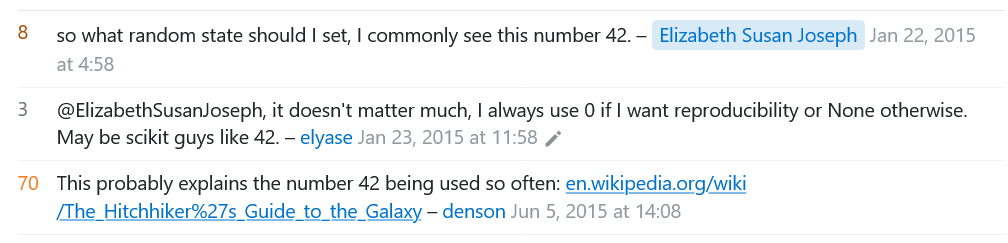

# TASK 5 run a random forest REGRESSION model

*report the score on the tranining and test data and identify the most important features*

*(hint: if you see "ValueError: Input contains NaN, infinity or a value too large for dtype('float64')." check*
1. np.isnan(Xn).sum().sum() and np.isnan(Xc).sum().sum() both return 0
2. np.isinf(Xn).sum().sum() returns 0
3. all the feature that had very large numbers (> 1e5) have been converted to the log of their values

## Training Data Accuracy

In [ ]:
rf = RandomForestRegressor(max_depth=4)
rf.fit(X_train, y_train)
print("accuracy on training data {:.2}".format(rf.score(X_train, y_train)))

accuracy on training data 0.77


## Model Test Accuracy

In [ ]:
print ("the model test accuracy is {:.2}".format(rf.score(X_test, y_test)))

the model test accuracy is 0.77


# Model Results: Feature Importances

I wrote this out to help me think through how the pieces connect.


*   rf.feature_importances_ is the importance of features by the order they were fed to the thing
*   sorted_idx is an index of the features in order of importance
*  columns is just the columns from the data before it was fed to random forests. If I connect it to rf.feature_importances_, I get the feature names with their importance. If I connect it to sorted_idx, I get feature names in order of rank.



In [ ]:
#this is how you see the importance of the features
rf.feature_importances_[:10]

array([0.9324538 , 0.00158682, 0.0018269 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
# making updated array of feature/column names (numeric then categorical)
columns = np.concatenate([X_numeric_data.columns, feature_name_cat])
#columns

In [ ]:
#creating an index of rankings of feature importances
sorted_idx = np.argsort(rf.feature_importances_)
sorted_idx

array([ 69,  91,  90,  89,  88,  87,  84,  82,  81,  80,  77,  76,  92,
        73,  71,  68, 133,  66,  65,  64,  63,  62,  61,  59,  57,  72,
        56,  93,  95, 131, 130, 129, 128, 127, 126, 125, 124, 122, 120,
       119,  94, 118, 111, 110, 109, 108, 107, 136, 104, 101, 100,  98,
        97, 117,  55,  67,  53,  28,  27,  26,  54,  24,  23,  22,  21,
        20,  19,  18,  17,  16,  15,  14,  13,  12,  10,   9,   8,   7,
         6,   5,   4,   3,  29,  34, 134,  44,  43,  41,  47,  35,  52,
        37,  48,  51,  38,  39,  49,  70,  96, 123, 137, 116,  31,  86,
        33, 115, 113,  42,  11,  32, 121,  99,  46,  58, 105, 114,  45,
       132,  83,  85,  36, 103,  60, 112,  75,  74,  50,  40,   1,  79,
        30,   2, 102,  25,  78, 138, 106, 135,   0])

In [ ]:
#did this to check if it would do what I wanted, which it did
#(columns)[sorted_idx]

In [ ]:
sorted_column_names = columns[sorted_idx]
#sorted_column_names

:I still keep getting stuck, so I put stuff  into the demo plot.

```
# plt.figure(figsize=(10,15))
plt.title('Feature importances')
plt.barh(sorted_column_names, rf.feature_importances_[sorted_idx],
        color='Steelblue', align='center')
plt.yticks(range(len(columns)), sorted_column_names);
plt.show()
```



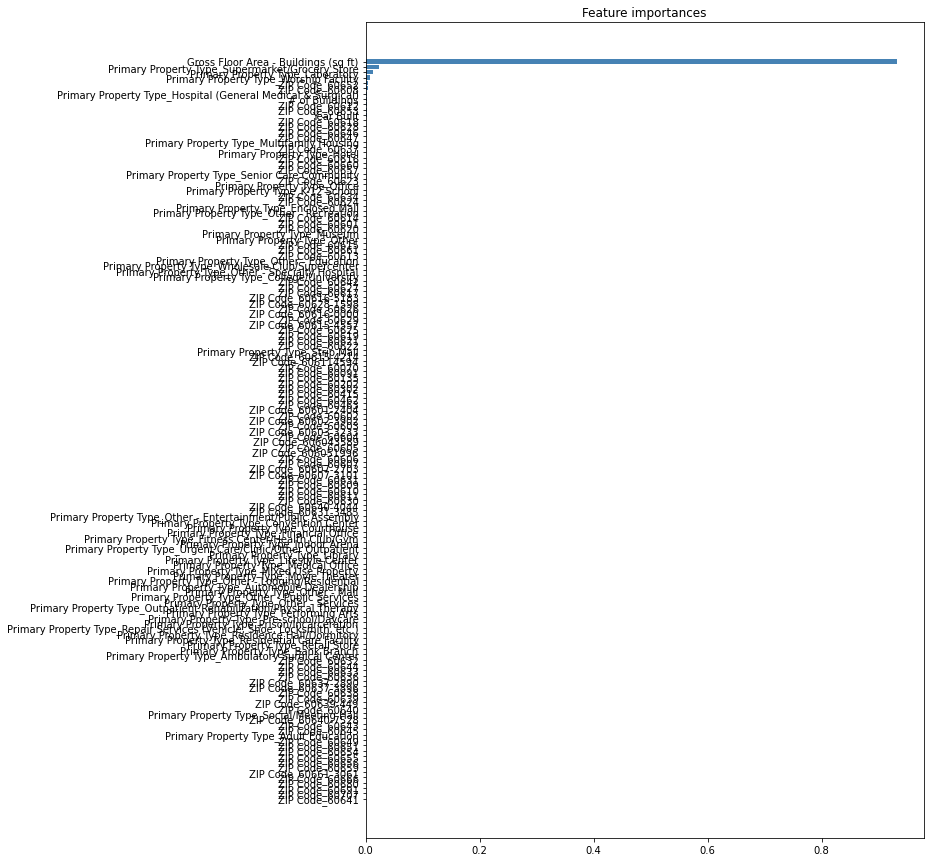

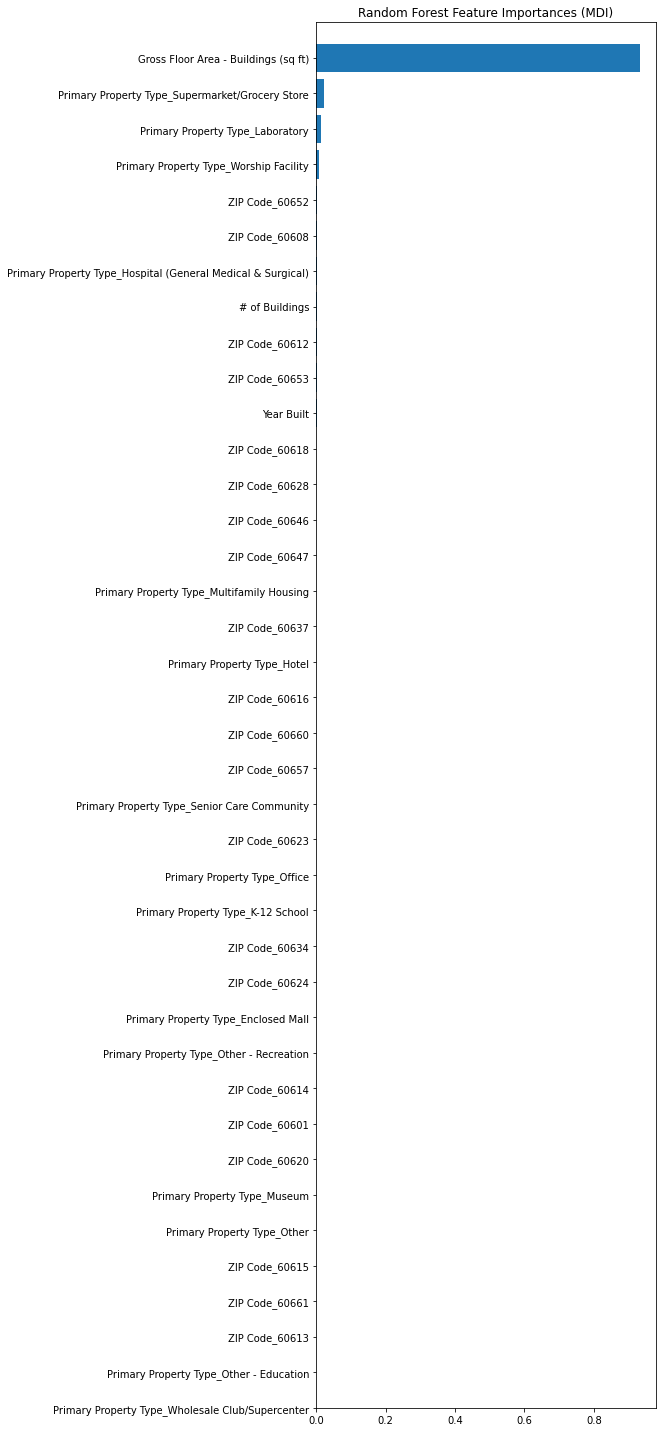

In [ ]:
y_ticks = np.arange(0, len(columns))
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(y_ticks, rf.feature_importances_[sorted_idx])
ax.set_yticklabels(sorted_column_names)
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
ax.set_ylim(100, len(columns))
plt.show()

## Conclusion
I think my model is pretty good! The findings make intuitive sense to me and it's not just one or two variables. I partly feel like building area isn't that interesting of a finding--without more details about the building structure, it seems obvious that bigger buildings use more energy. Though maybe the absence of most of the property types as important variables makes that more interesting (multifamily vs school, for example). The authors did note that the datasets with information on conditioned areas showed that that is a significant factor, i.e. living areas vs unheated storage, for example. My guess for grocery stores and labs being important is that grocery stores need a ton of refrigeration plus conditioned space for shoppers, and labs have equipment running 24/7 plus often deep freezers and backup systems. I wondre how many labs were in the data? Churches is more surprising and intriguing--is it something like how in Philly, there are a lot of huge, old, cavernous churches that can't afford HVAC or efficiency upgrades?

I'll compare this to DC in the DC notebook.

# TASK 6 do it for another city! note: the variable names wont be the same


# useful links and methods and functions I used: 

```df.dropna()``` to remove observation with missing variables

```df.drop(columns, axis=1)``` to remove features (columns)


```np.log10()``` and ```np.isinf()``` to convert to log space and find infinite values  

`np.hstack([X1, X2])` to concatenate two arrays


one hot encoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html and https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/


KNN imputer https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html , https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/, and 
https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/  